In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import t, ttest_ind  # t is for confidence intervals
warnings.filterwarnings('ignore')


In [2]:
#creating connection to db
conn = sqlite3.connect('inventory.db')

In [3]:
#Loadiing the dataset
df = pd.read_sql("select * from vendor_sales_summary",conn)
df.head()

,False,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,TotalSalesQuantity,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,260999.20,142049.0,68601.68,1290667.91,25.297693,0.979108,1.338647
1,1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,294438.66,160247.0,144929.24,1015032.27,21.062810,0.976890,1.266830
2,2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,343854.07,187140.0,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,368242.80,200412.0,257032.07,1214774.94,27.139908,0.993703,1.372493
4,4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,249587.83,135838.0,257032.07,1199901.61,28.412764,0.983556,1.396897


In [4]:
df['Brand'].nunique()

10663

### Exploratory Data Analysis

● Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

● In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
False,10692.0,5.345500e+03,3086.658873,0.00,2672.750000,5345.500000,8018.250000,1.069100e+04
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [11]:
df = pd.read_sql("""SELECT * FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0 
""",conn)

    

In [6]:
df.drop('False', axis=1, inplace=True)  # axis=1 for columns

In [7]:
numerical_col = df.select_dtypes(include = np.number).columns

In [8]:
numerical_col

Index(['VendorNumber', 'Brand', 'PurchasePrice', 'ActualPrice', 'Volume',
       'TotalPurchaseQuantity', 'TotalPurchaseDollars', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'TotalSalesQuantity',
       'FreightCost', 'GrossProfit', 'ProfitMargin', 'StockTurnover',
       'SalestoPurchaseRatio'],
      dtype='object')

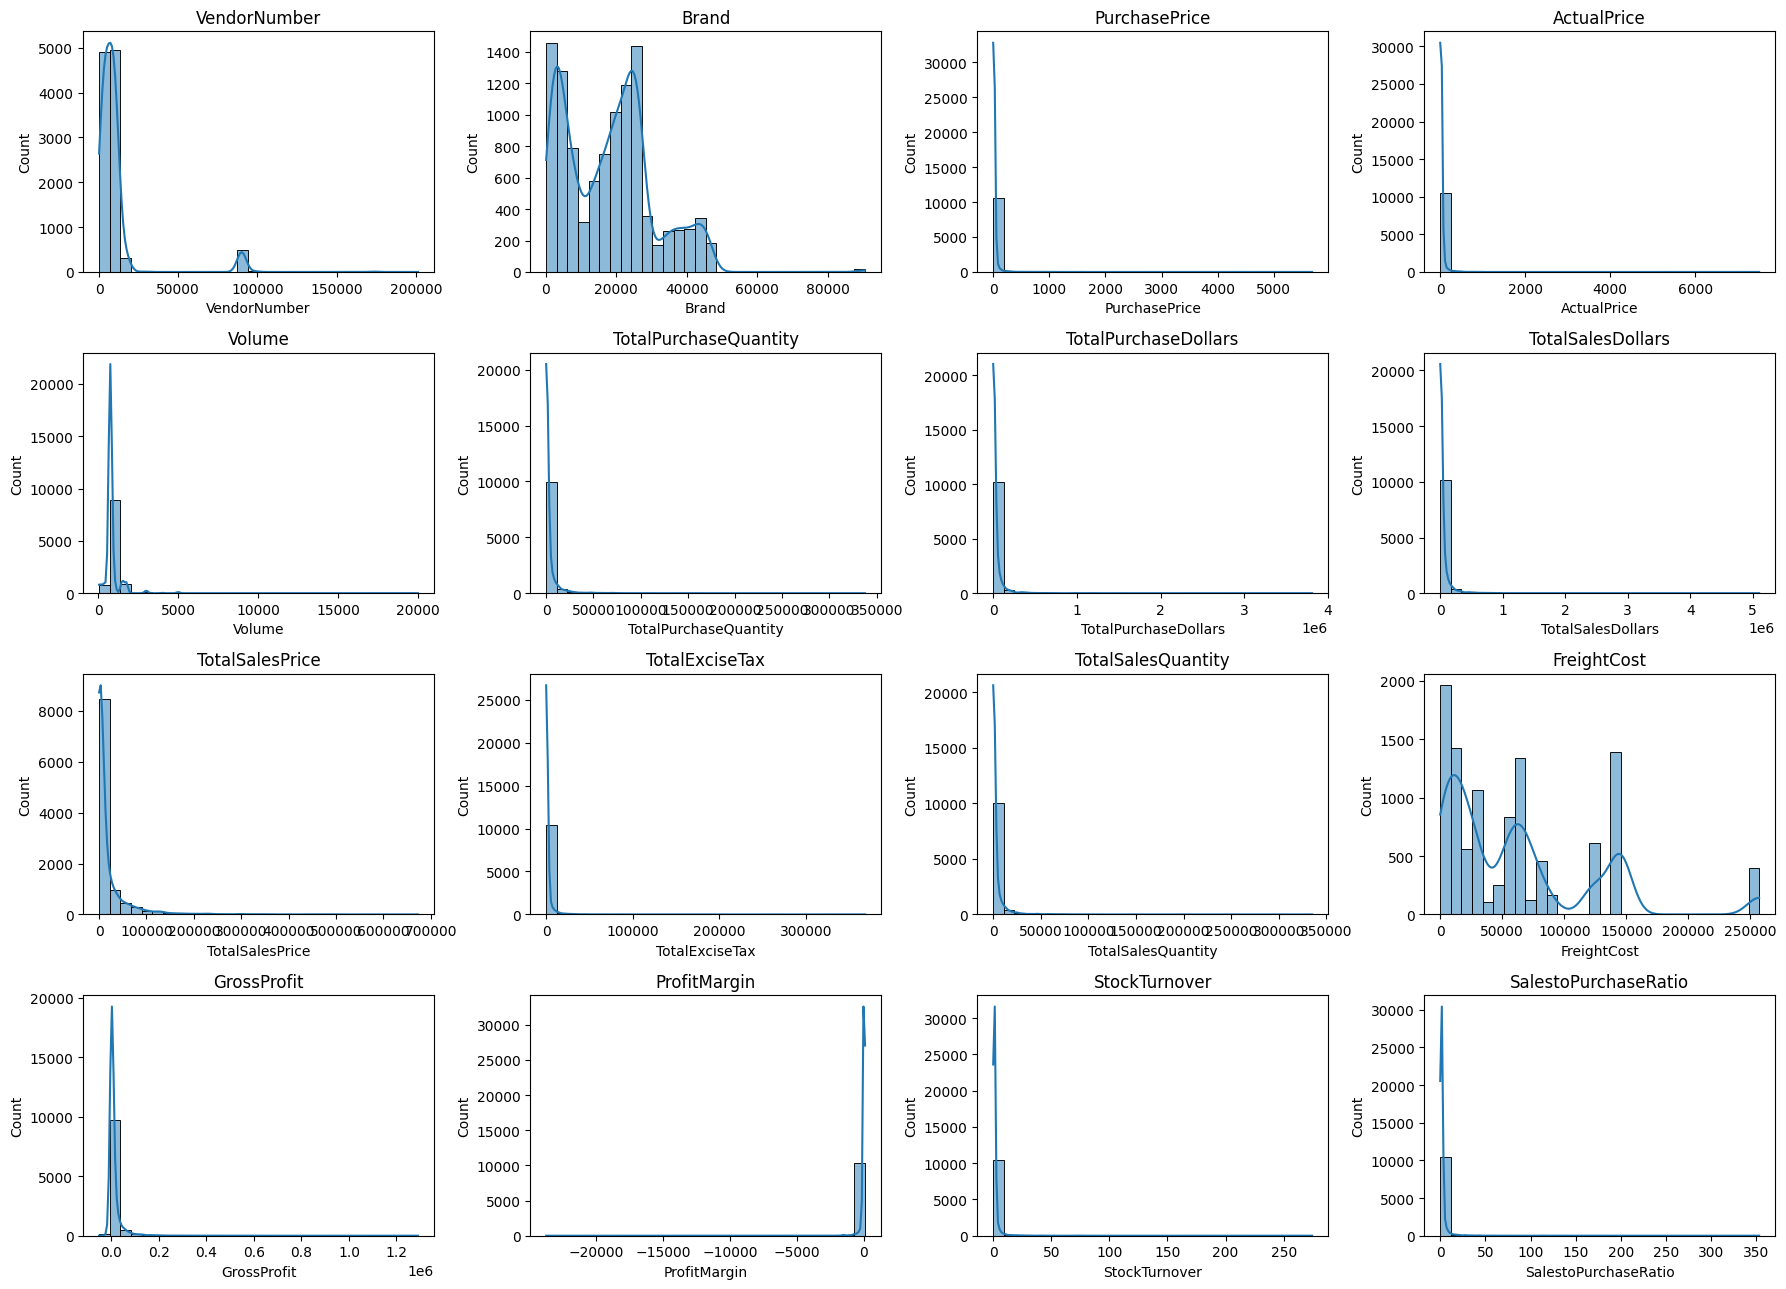

In [9]:
plt.figure(figsize=(18,13))
for i, col in enumerate(numerical_col):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

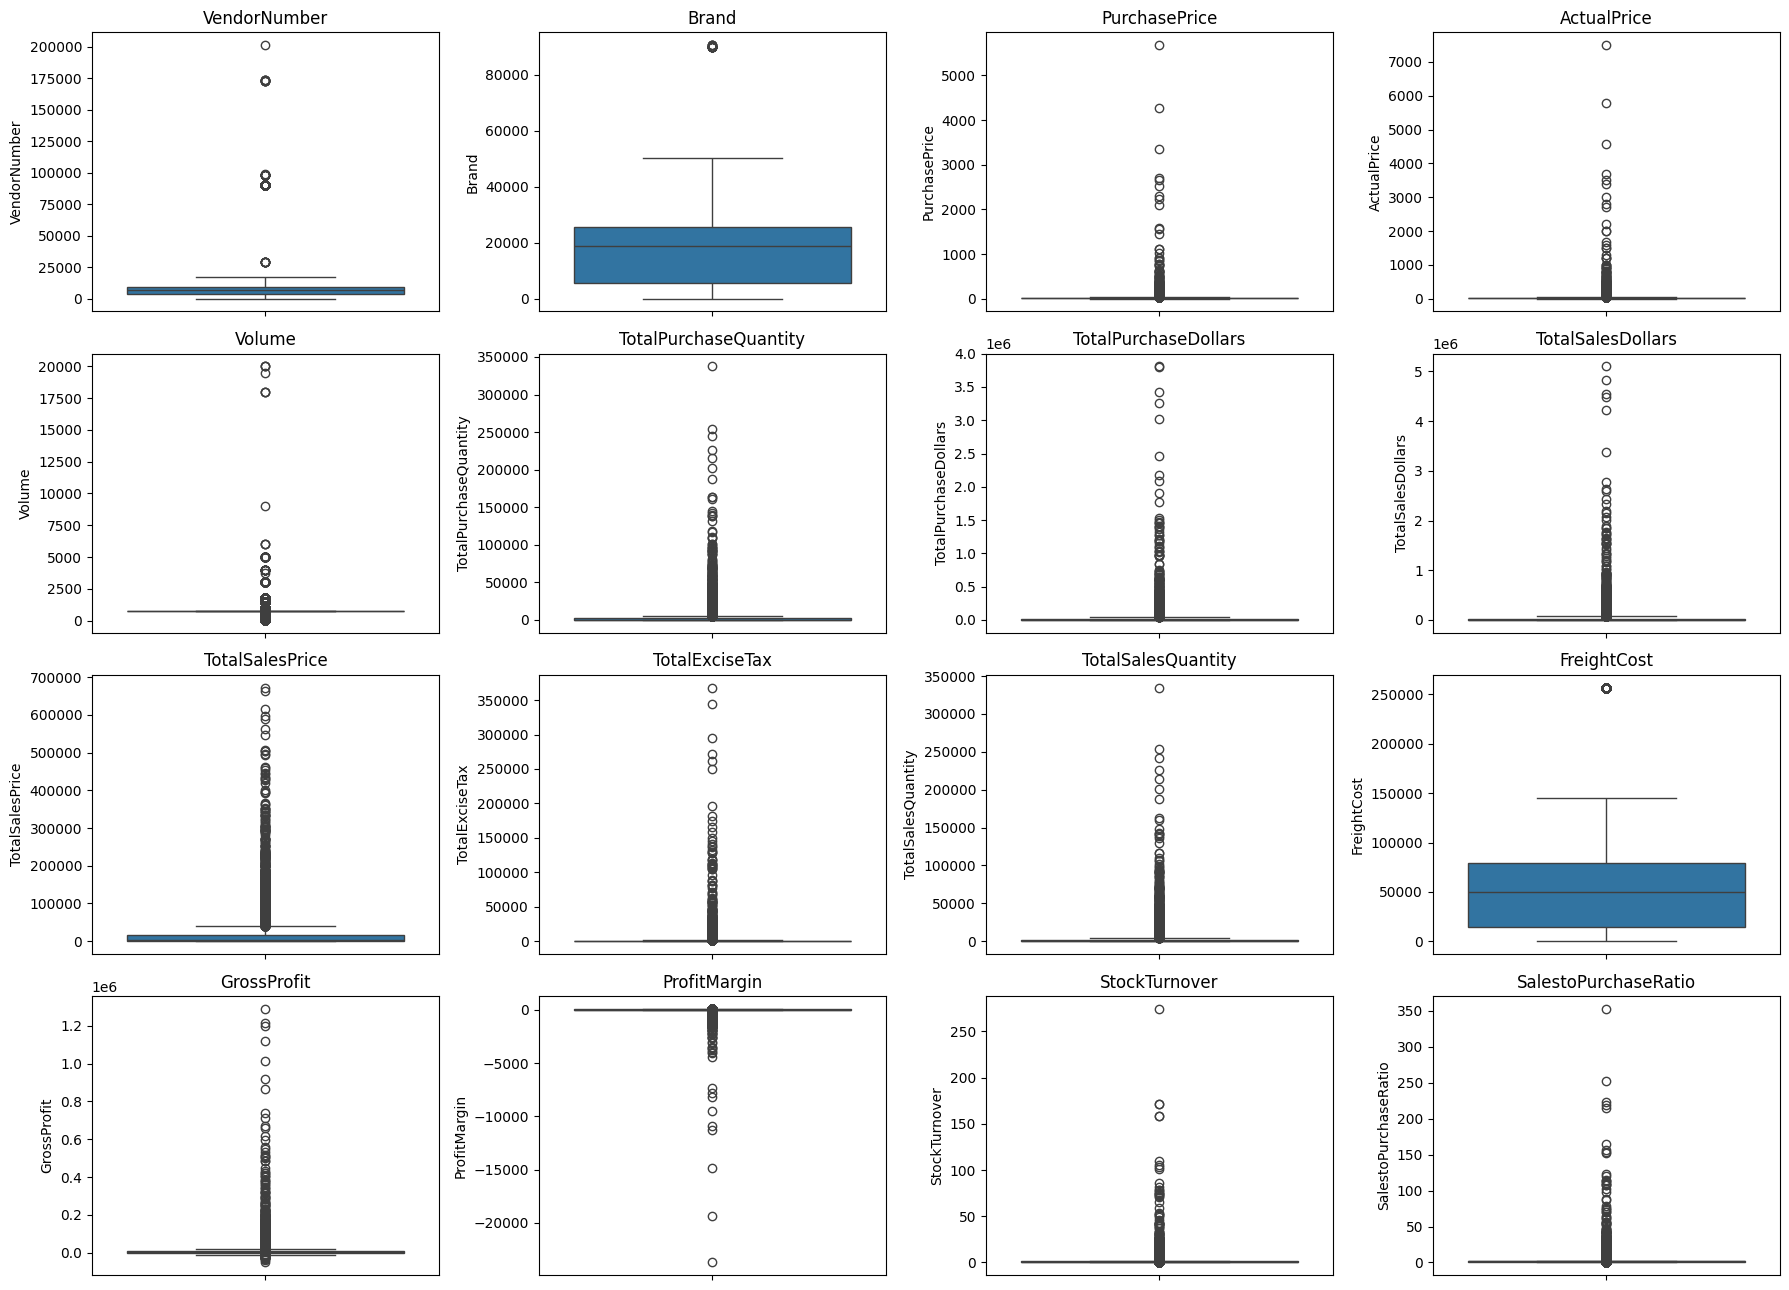

In [10]:
plt.figure(figsize=(18,13))
for i, col in enumerate(numerical_col):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Summary Statistics Insights:

#### Negative & Zero Values:

● **Gross Profit**: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

● **Profit Margin**: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

● **Total Sales Quantity & Sales Dollars**: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

#### Outliers Indicated by High Standard Deviations:

● **Purchase & Actual Prices**: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

● **Freight Cost**: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

● **Stock Turnover**: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales being fulfilled from older stock.


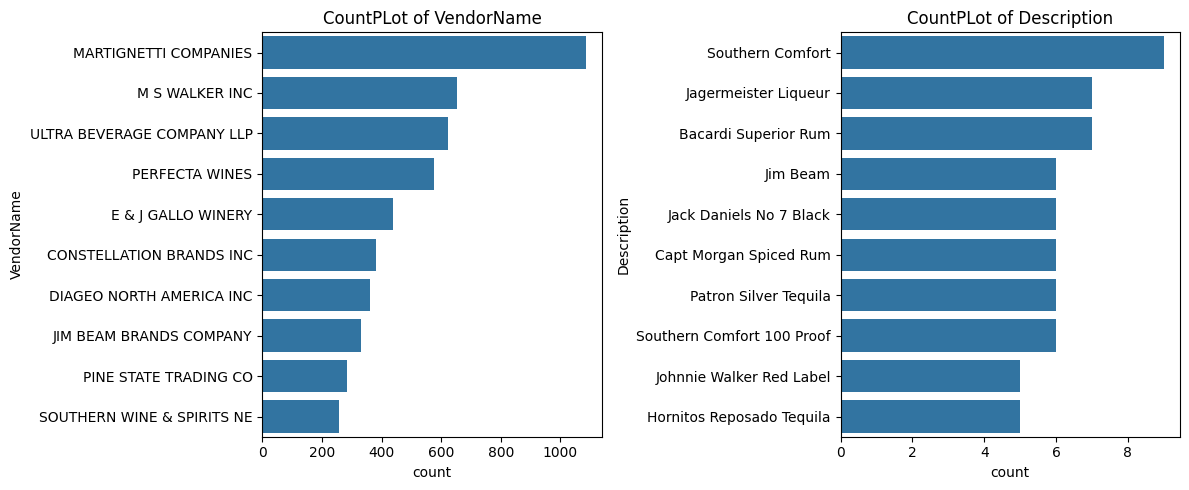

In [12]:
categorical_col = ['VendorName','Description']
plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_col):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col] ,order = df[col].value_counts().index[:10])
    plt.title(f'CountPLot of {col}')
plt.tight_layout()
plt.show()

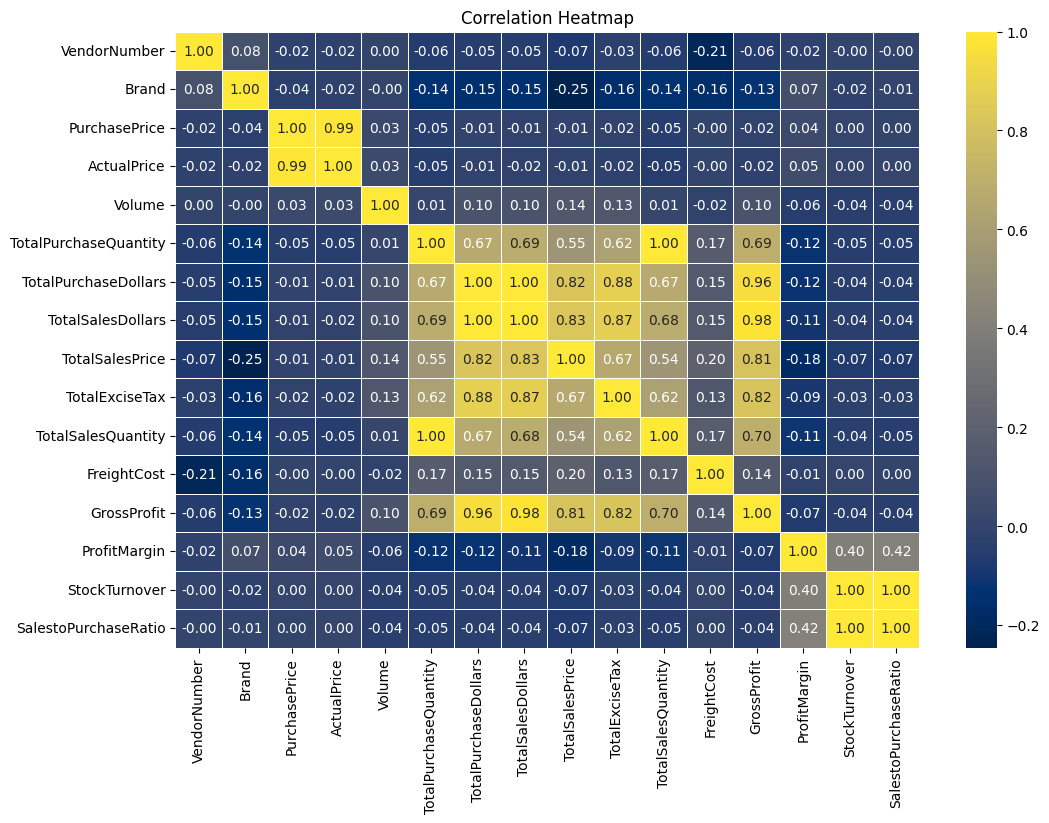

In [13]:
plt.figure(figsize = (12,8))
corr_matrix = df[numerical_col].corr()
sns.heatmap(corr_matrix, annot = True , fmt = ".2f" , cmap = 'cividis' , linewidths = 0.7)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights

● **PurchasePrice** has weak correlations with **TotalSalesDollars** (-0.012) and **GrossProfit** (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

● Strong correlation between **total purchase quantity** and **total sales quantity** (0.999), confirming efficient inventory turnover.

● Negative correlation between **profit margin** and **total sales price** (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

● **StockTurnover** has weak negative correlations with both **GrossProfit** (-0.038) and **ProfitMargin** (-0.055), indicating that faster turnover does not necessarily result in higher profitability.


 ## Data Analysis
 ● **Identify Brands that needs Promotional or Pricing adjustments which exhibit lower sales performance but higher margins**

In [14]:
brand_performance = df.groupby('Description').agg({'TotalSalesDollars' : 'sum','ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [15]:
sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
ProfitMargin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [16]:
sales_threshold

np.float64(560.299)

In [17]:
ProfitMargin_threshold

np.float64(64.97017552750113)

In [18]:
target_brands = brand_performance[
(brand_performance['TotalSalesDollars'] < sales_threshold ) & (brand_performance['ProfitMargin'] > ProfitMargin_threshold)]

In [19]:
target_brands.sort_values('TotalSalesDollars')

,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [20]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

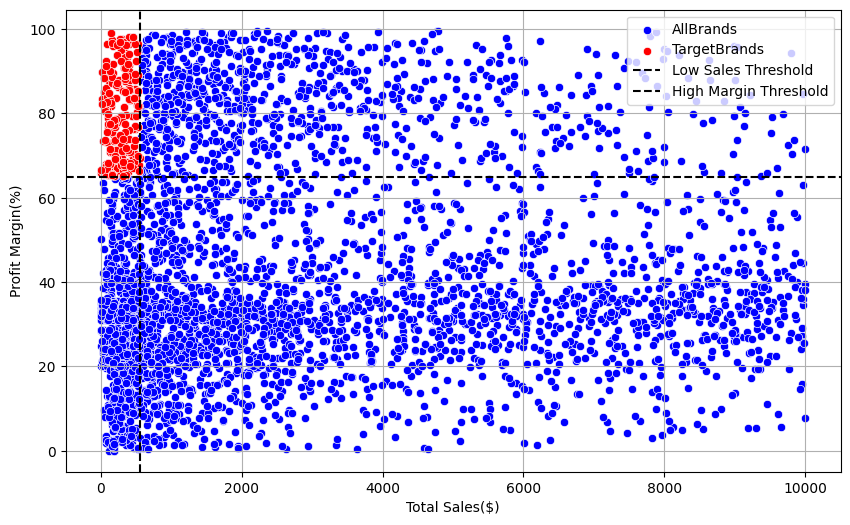

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = brand_performance , x = 'TotalSalesDollars' , y = 'ProfitMargin' , color = 'blue' ,label = 'AllBrands' )
sns.scatterplot(data = target_brands , x = 'TotalSalesDollars' , y = 'ProfitMargin' , color = 'red' ,label = 'TargetBrands' )

plt.axvline(sales_threshold , linestyle = '--' , color = 'black', label = 'Low Sales Threshold')
plt.axhline(ProfitMargin_threshold , linestyle = '--' , color = 'black', label = 'High Margin Threshold')

plt.xlabel('Total Sales($)')
plt.ylabel('Profit Margin(%)')
plt.legend()
plt.grid(True)
plt.show()

#### Which Vendors and Brands Demonstrate the highest sales performance

In [22]:
def format_k_m(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return f"{value:.2f}"


In [23]:
top_vendors_df = (
    df.groupby('VendorName')['TotalSalesDollars']
    .sum()
    .nlargest(10)
    .reset_index()
    .sort_values('TotalSalesDollars', ascending=False)  # For horizontal bar order
)

top_brands_df = (
    df.groupby('Description')['TotalSalesDollars']
    .sum()
    .nlargest(10)
    .reset_index()
    .sort_values('TotalSalesDollars', ascending=False)
)

In [24]:
top_vendors_df

,VendorName,TotalSalesDollars
0,DIAGEO NORTH AMERICA INC,67990099.42
1,MARTIGNETTI COMPANIES,39330359.36
2,PERNOD RICARD USA,32063196.19
3,JIM BEAM BRANDS COMPANY,31423020.46
4,BACARDI USA INC,24854817.14
5,CONSTELLATION BRANDS INC,24218745.65
6,E & J GALLO WINERY,18399899.46
7,BROWN-FORMAN CORP,18247230.65
8,ULTRA BEVERAGE COMPANY LLP,16502544.31
9,M S WALKER INC,14706458.51


In [25]:
top_brands_df

,Description,TotalSalesDollars
0,Jack Daniels No 7 Black,7964746.76
1,Tito's Handmade Vodka,7399657.58
2,Grey Goose Vodka,7209608.06
3,Capt Morgan Spiced Rum,6356320.62
4,Absolut 80 Proof,6244752.03
5,Jameson Irish Whiskey,5715759.69
6,Ketel One Vodka,5070083.56
7,Baileys Irish Cream,4150122.07
8,Kahlua,3604858.66
9,Tanqueray,3456697.90


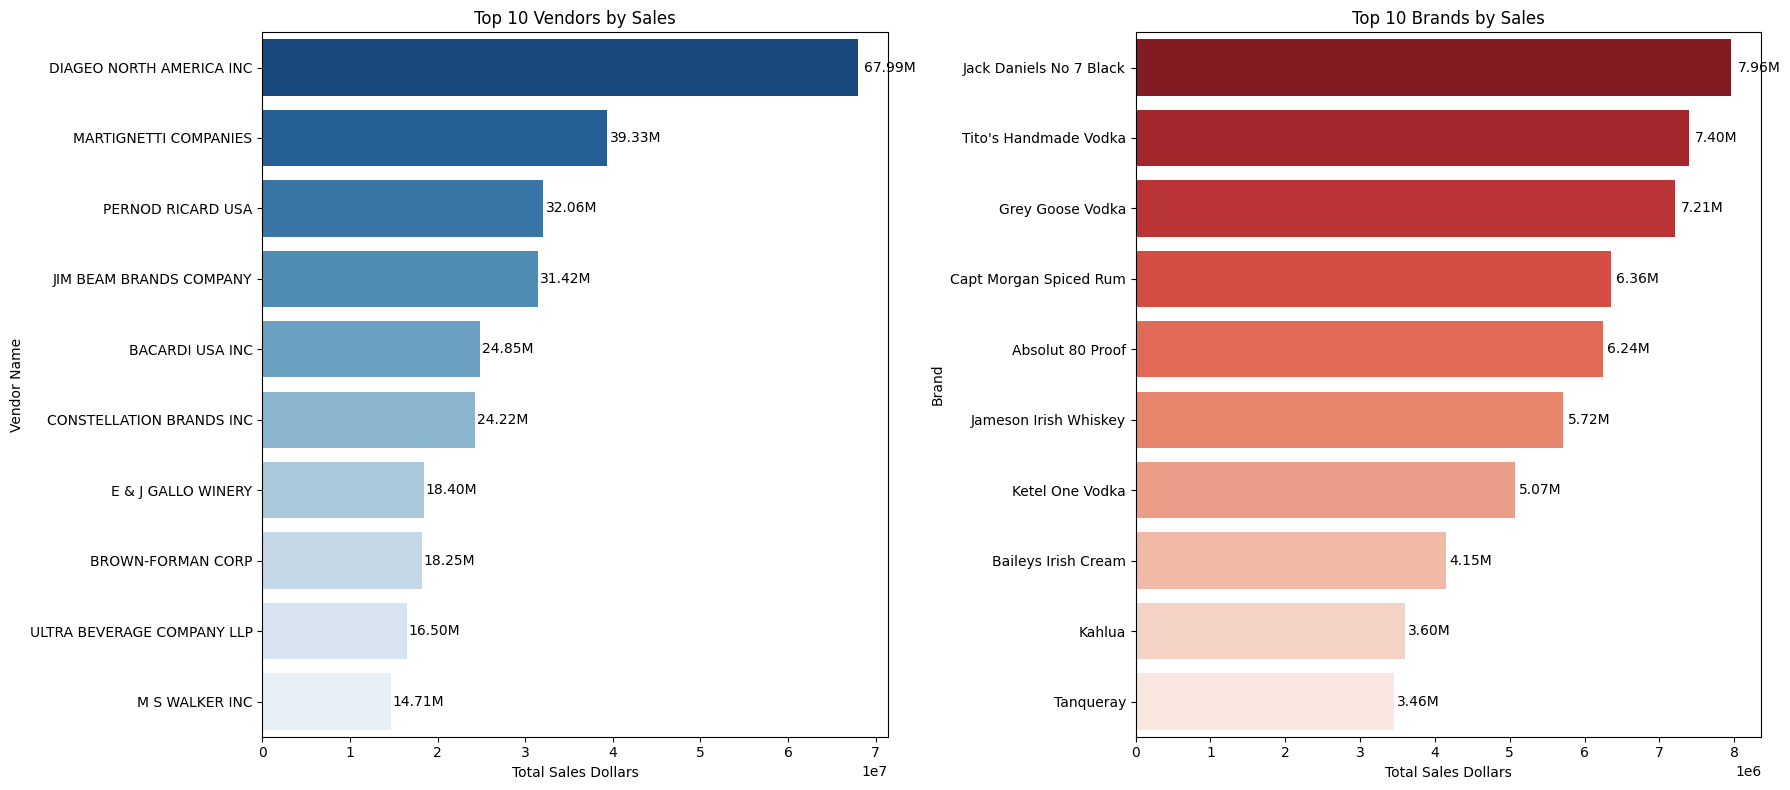

In [26]:
# Create side-by-side horizontal barplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Top Vendors (horizontal)
sns.barplot(
    data=top_vendors_df,
    x='TotalSalesDollars',
    y='VendorName',
    palette='Blues_r',
    ax=axes[0]
)
axes[0].set_title('Top 10 Vendors by Sales')
axes[0].set_xlabel('Total Sales Dollars')
axes[0].set_ylabel('Vendor Name')

# Add value labels
for bar, value in zip(axes[0].patches, top_vendors_df['TotalSalesDollars']):
    axes[0].text(
        bar.get_width() + 0.01 * bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        format_k_m(value),
        va='center'
    )

# Plot 2: Top Brands (horizontal)
sns.barplot(
    data=top_brands_df,
    x='TotalSalesDollars',
    y='Description',
    palette='Reds_r',
    ax=axes[1]
)
axes[1].set_title('Top 10 Brands by Sales')
axes[1].set_xlabel('Total Sales Dollars')
axes[1].set_ylabel('Brand')

# Add value labels
for bar, value in zip(axes[1].patches, top_brands_df['TotalSalesDollars']):
    axes[1].text(
        bar.get_width() + 0.01 * bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        format_k_m(value),
        va='center'
    )

plt.tight_layout()
plt.show()

#### Which Vendor contribute the most to total purchase dollars

In [27]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'}).sort_values('TotalPurchaseDollars',ascending = False).reset_index()



In [28]:
vendor_performance['TotalPurchaseDollars%'] = (vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum())*100

In [29]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,TotalPurchaseDollars%
0,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.300345
1,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.297724
2,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.760554
3,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.644441
4,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.671930
...,...,...,...,...,...
114,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.000042
115,UNCORKED,118.74,58.20,176.94,0.000039
116,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.000025
117,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.000018


In [30]:
vendor_performance['TotalPurchaseDollars%'] = (vendor_performance['TotalPurchaseDollars%'].round(2))

In [31]:
top_vendors = vendor_performance.loc[:10]

In [32]:
top_vendors 

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,TotalPurchaseDollars%
0,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
1,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
2,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
3,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
4,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
5,CONSTELLATION BRANDS INC,15273708.08,8945037.57,24218745.65,4.97
6,BROWN-FORMAN CORP,13238939.18,5008291.47,18247230.65,4.31
7,E & J GALLO WINERY,12068539.22,6331360.24,18399899.46,3.93
8,ULTRA BEVERAGE COMPANY LLP,11167081.61,5335462.70,16502544.31,3.63
9,M S WALKER INC,9764312.60,4942145.91,14706458.51,3.18


In [33]:
top_vendors['Cum%'] = top_vendors['TotalPurchaseDollars%'].cumsum()

In [34]:
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_k_m)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_k_m)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_k_m)

In [35]:
for i,value in enumerate(top_vendors['TotalPurchaseDollars%']):
    print(i,value)

0 16.3
1 8.3
2 7.76
3 7.64
4 5.67
5 4.97
6 4.31
7 3.93
8 3.63
9 3.18
10 3.16


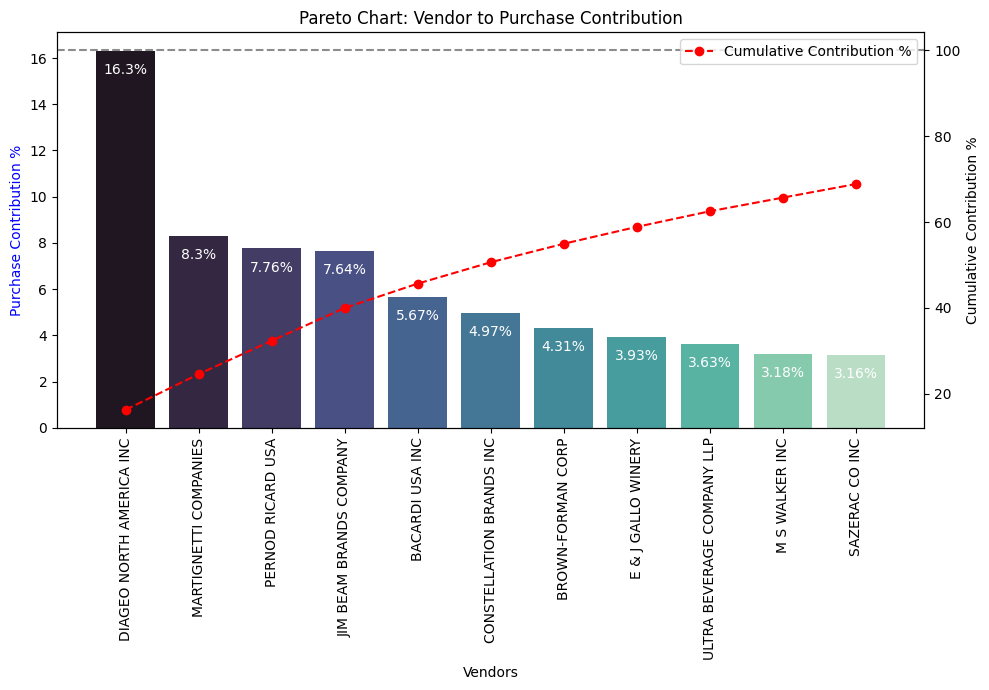

In [36]:
fig,ax1 = plt.subplots(figsize = (10,7))
# Bar plot (Vendor vs Purchase Contribution %)
sns.barplot(data=top_vendors, x='VendorName', y='TotalPurchaseDollars%', palette='mako', ax=ax1)

# Annotate bar values
for i, value in enumerate(top_vendors['TotalPurchaseDollars%']):
    ax1.text(i, value - 1, f'{value}%', ha='center', fontsize=10, color='white')

# Second y-axis for cumulative line
ax2 = ax1.twinx()

# Line plot (Cumulative Contribution %)
ax2.plot(top_vendors['VendorName'], top_vendors['Cum%'], color='red', marker='o', linestyle='--', label='Cumulative Contribution %')

# Set axis labels and title
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax1.set_xlabel('Vendors')
ax2.set_ylabel('Cumulative Contribution %')
ax1.set_title('Pareto Chart: Vendor to Purchase Contribution')

# Add horizontal line at 100% and legend
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.9)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### How much Total Procurement Dependent on top 10 Vendors

In [37]:
total = round(top_vendors['TotalPurchaseDollars%'].sum(),2)
print(f'Total Procurement is dependent on Top 10 Vendors is {total}')

Total Procurement is dependent on Top 10 Vendors is 68.85


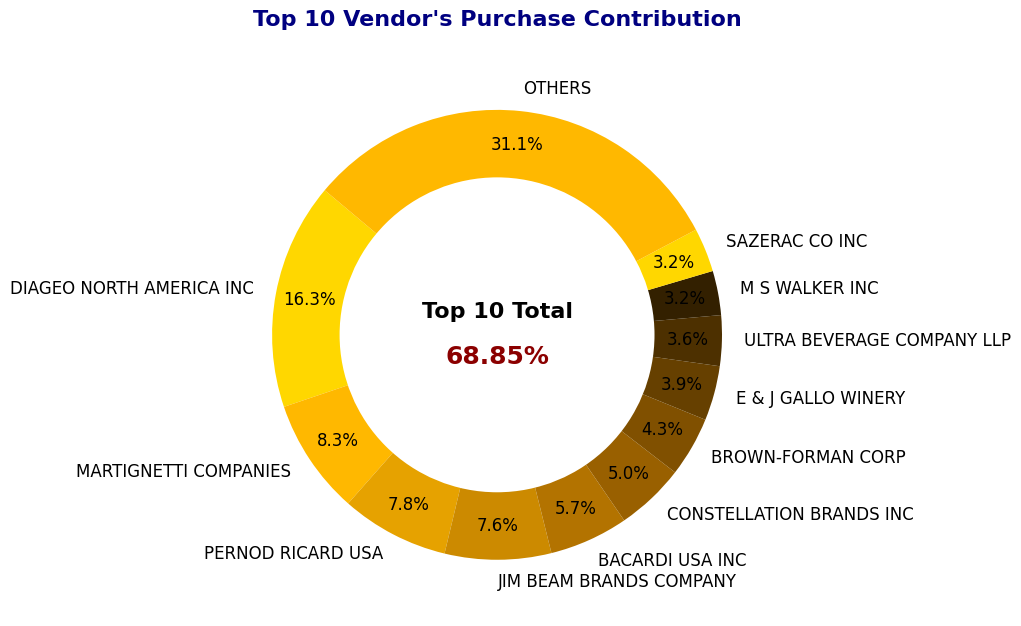

In [38]:
# Optional: use a nicer global font
mpl.rcParams['font.family'] = 'DejaVu Sans'  # or 'Roboto', 'Calibri', etc.

# Prepare data
contribution = list(top_vendors['TotalPurchaseDollars%'].values)
vendors = list(top_vendors['VendorName'].values)
others = round(100 - sum(contribution), 2)
contribution.append(others)
vendors.append('OTHERS')

# Premium gold color palette
colors = ['#FFD700', '#FFB800', '#E6A200', '#CC8A00', '#B37300', 
          '#996000', '#805000', '#664000', '#4D3000', '#332000']

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    contribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

# Donut center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Central text
total = round(top_vendors['TotalPurchaseDollars%'].sum(), 2)
ax.text(0, 0.1, 'Top 10 Total', fontsize=16, fontweight='bold', ha='center', va='center')
ax.text(0, -0.1, f'{total:.2f}%', fontsize=18, fontweight='bold', color='darkred', ha='center', va='center')

# Title styling
plt.title("Top 10 Vendor's Purchase Contribution", fontsize=16, fontweight='bold', color='navy', pad=20)

# Tidy layout
plt.tight_layout()
plt.show()

#### Does Purchasing in Bulk reduces the Unit Price, And what is the Optimal purchase volume for cost savings?

In [39]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [40]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q = 3,labels = ['Small','Medium','Large'])

In [41]:
df.groupby('OrderSize')['UnitPurchasePrice'].mean()

OrderSize
Small     39.068186
Medium    15.486414
Large     10.777625
Name: UnitPurchasePrice, dtype: float64

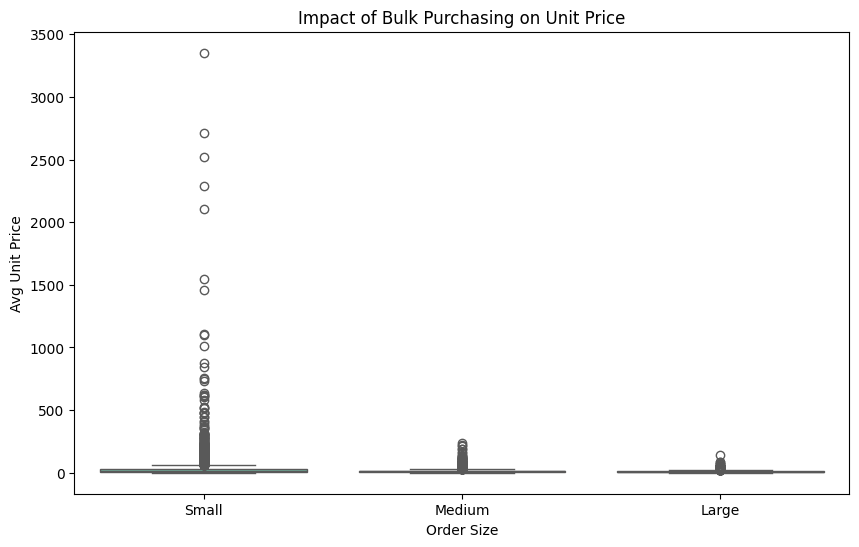

In [42]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df, x = 'OrderSize', y = 'UnitPurchasePrice',palette = "Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Avg Unit Price")
plt.show()

● Bulk purchases reduce the average unit price to $10.8, leading to higher margins.

● Unit price drops significantly — about 72% lower — in large quantity orders.

● This confirms bulk buying strategies help increase volume, lower cost, and boost margin.


#### Which Vendors have Low Invenotry Turnover , Indicating excess stock and low moving prodcuts

In [43]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending = True).reset_index().head(10)

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
1,HIGHLAND WINE MERCHANTS LLC,0.708333
2,PARK STREET IMPORTS LLC,0.751306
3,Circa Wines,0.755676
4,Dunn Wine Brokers,0.766022
5,CENTEUR IMPORTS LLC,0.773953
6,SMOKY QUARTZ DISTILLERY LLC,0.783835
7,TAMWORTH DISTILLING,0.797078
8,THE IMPORTED GRAPE LLC,0.807569
9,WALPOLE MTN VIEW WINERY,0.820548


#### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [44]:
# Step 1: Calculate unsold quantity
df['UnsoldQuantity'] = df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']


# Step 3: Calculate unsold inventory value
df['UnsoldInventoryValue'] = df['UnsoldQuantity'] * df['PurchasePrice']
total_unsold_value = df[df['UnsoldInventoryValue'] > 0]['UnsoldInventoryValue'].sum()
# Step 4: Sum it and display
print('Total Unsold Inventory Value:', format_k_m(total_unsold_value))


Total Unsold Inventory Value: 9.55M


In [45]:
Unsold_df = df.groupby("VendorName")[['UnsoldQuantity','UnsoldInventoryValue']].mean().sort_values(
    'UnsoldInventoryValue',ascending = False).reset_index().head(10)
Unsold_df['UnsoldQuantity'] = Unsold_df['UnsoldQuantity'].apply(format_k_m)
Unsold_df['UnsoldInventoryValue'] = Unsold_df['UnsoldInventoryValue'].apply(format_k_m)
Unsold_df

,VendorName,UnsoldQuantity,UnsoldInventoryValue
0,WILLIAM GRANT & SONS INC,246.53,5.51K
1,CALEDONIA SPIRITS INC,167.50,5.42K
2,TAMWORTH DISTILLING,250.00,4.84K
3,SWEET BABY VINEYARD,508.00,4.24K
4,DUGGANS DISTILLED PRODUCTS,324.25,3.42K
5,MAJESTIC FINE WINES,349.56,3.18K
6,MANGO BOTTLING INC,441.25,3.18K
7,REMY COINTREAU USA INC,119.05,3.04K
8,EDRINGTON AMERICAS,69.43,3.00K
9,PERNOD RICARD USA,118.25,2.10K


#### What is the 95% Confidence Interval for Top performing and low performing vendors

In [48]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.15)
top_threshold

np.float64(40622.1125)

In [53]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]['ProfitMargin'].dropna()

In [61]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = t.ppf((1 + confidence) / 2, df=len(data) - 1)  # use stats.t.ppf if importing stats
    margin_of_err = t_critical * std_err
    return mean_val, mean_val - margin_of_err, mean_val + margin_of_err

Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (37.24, 39.76), Mean: 38.50


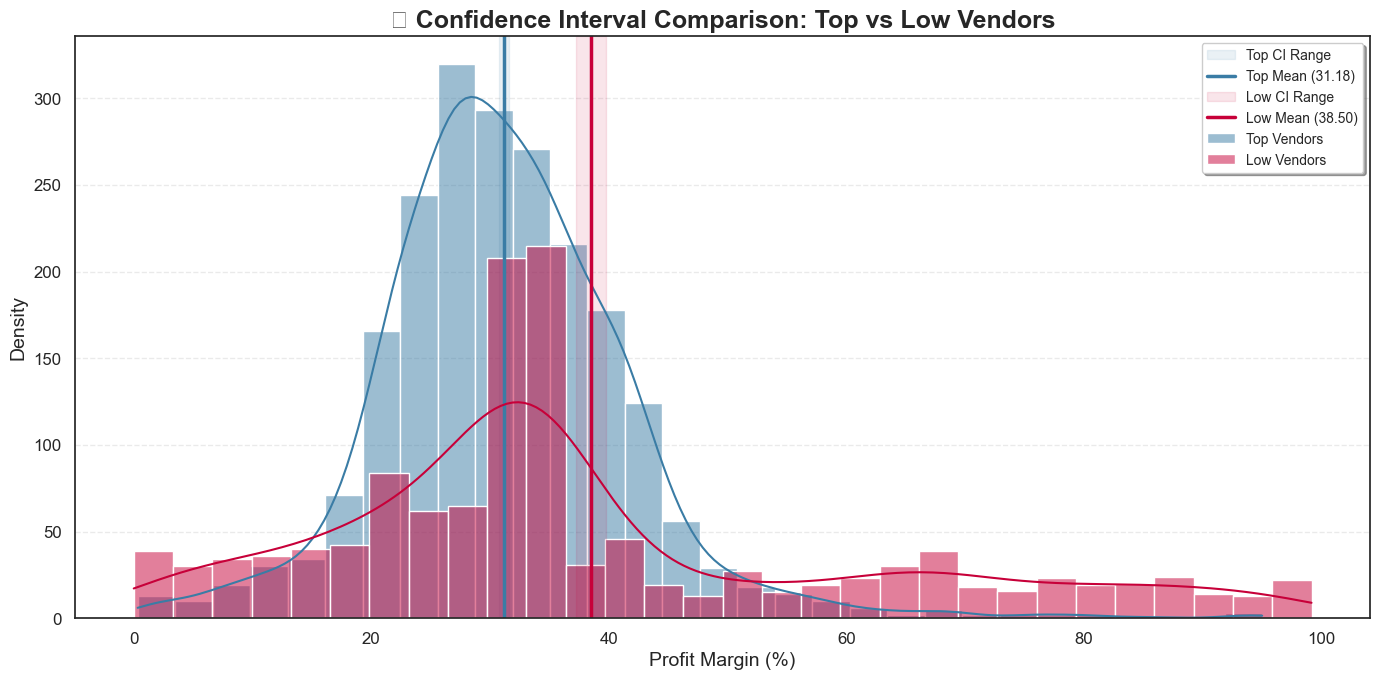

In [69]:
# Confidence intervals
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

# Print CI
print(f'Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}')
print(f'Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}')

# Set Seaborn theme
sns.set_theme(style="white", font_scale=1.1)
plt.figure(figsize=(14, 7))

# Top Vendors Histogram
sns.histplot(top_vendors, kde=True, bins=30, color='#3A7CA5', alpha=0.5, label='Top Vendors')
plt.axvspan(top_lower, top_upper, color='#3A7CA5', alpha=0.1, label=f'Top CI Range')
plt.axvline(top_mean, color='#3A7CA5', linestyle='-', linewidth=2.5, label=f'Top Mean ({top_mean:.2f})')

# Low Vendors Histogram
sns.histplot(low_vendors, kde=True, bins=30, color='#C70039', alpha=0.5, label='Low Vendors')
plt.axvspan(low_lower, low_upper, color='#C70039', alpha=0.1, label=f'Low CI Range')
plt.axvline(low_mean, color='#C70039', linestyle='-', linewidth=2.5, label=f'Low Mean ({low_mean:.2f})')

# Labeling
plt.title("📈 Confidence Interval Comparison: Top vs Low Vendors", fontsize=18, fontweight='bold')
plt.xlabel("Profit Margin (%)", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Grid and Style
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, fontsize=10)
plt.tight_layout()
plt.show()

### 📊 Insight Summary

- ● The confidence interval for **low-performing vendors** **_(37.24% to 39.76%)_** is significantly higher than that of **top-performing vendors** **_(30.74% to 31.61%)_**.

- ● This suggests vendors with **lower sales** tend to have **higher profit margins**, potentially due to **premium pricing** or **lower operational costs**.

- ● For **high-performing vendors**: To improve profitability, they could explore strategies like **selective pricing adjustments**, **cost optimization**, or **bundling strategies**.

- ● For **low-performing vendors**: Despite higher margins, their **low sales volume** indicates a need for better **marketing**, **competitive pricing**, or **improved distribution strategies**.


#### 📌 Hypothesis: Is there a significant difference between top-performing and low-performing vendors?

- **Null Hypothesis (H₀):**  
  There is **no significant difference** in the profit margins between top-performing vendors and low-performing vendors.  

- **Alternate Hypothesis (H₁):**  
  There **is a significant difference** in the profit margins between top-performing and low-performing vendors.  
  


In [74]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.15)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]['ProfitMargin'].dropna()

t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

# Results
print(f"T-Statistic: {t_stat:.4f}, P_value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in the profit margins between top-performing and low-performing vendors.")
else:
    print("Fail to reject H₀: There is no significant difference in the profit margins between top-performing and low-performing vendors.")


T-Statistic: -10.7494, P_value: 0.0000
Reject H₀: There is a significant difference in the profit margins between top-performing and low-performing vendors.


### 🧪 Hypothesis Test Result

- **Test:** Welch's t-test (independent samples, unequal variance)
- **T-Statistic:** -10.7494  
- **P-value:** < 0.0001

#### ✅ Conclusion:
We **reject the null hypothesis (H₀)**.

➡️ There is a **statistically significant difference** in the profit margins between **top-performing** and **low-performing vendors**.

This strong result suggests that vendor performance level (based on sales) is **associated with different profitability behavior** — likely due to business models, pricing, and cost structures.
